# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
df_a=pd.read_csv('5_a.csv')
df_a.head(10)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


TNR:  0.0 FPR:  1.0  FNR:  0.0 TPR: 1.0
F1_Score: 0.9950248756218906
Accuracy: 0.9900990099009901
AUC score: 0.48829900000000004


<function matplotlib.pyplot.show(close=None, block=None)>

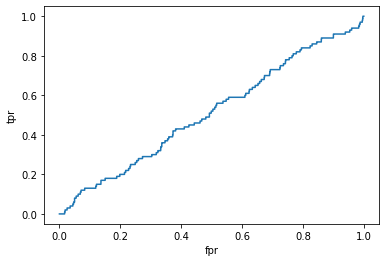

In [54]:
from random import sample
import matplotlib.pyplot as plt
y_pred = []
for index, row in df_a.iterrows():
    if(row['proba'] < 0.5):
        y_pred.append(0.0)
    else:
        y_pred.append(1.0)
df_a['y_pred'] = y_pred


def confusion_matrix(y_actual, y_pred='y_pred'):
    '''This method takes input as two numpy.ndarray and computes confusion matrix
    and return TNR, FPR, FNR, TPR, TN, FP, FN, TP  in the order specified here'''
    TN = 0
    FN = 0
    FP = 0 
    TP = 0
    if((type(y_actual) != type(y_pred)) and isinstance(y_actual, np.ndarray) and isinstance(y_pred, np.ndarray)):
        print("invalid input, both inputs should be of same type i.e np.ndarray")
    elif(len(y_actual) != len(y_pred)):
        print("inputs are not of same length, to comapre both inputs should be of same length.")
    else:
        for i in range(len(y_actual)):
            if(y_actual[i] == y_pred[i] and y_actual[i] == 0.0):
                TN += 1
            elif(y_actual[i] == y_pred[i] and y_actual[i] == 1.0):
                TP += 1
            elif(y_actual[i] != y_pred[i] and y_actual[i] == 0.0):
                FP += 1
            else:
                FN += 1
    P = FN + TP
    N = TN + FP
    TNR = TN/N ; FPR = FP/N; FNR = FN/P; TPR = TP/P
    return TNR, FPR, FNR, TPR, TN, FP, FN, TP 
            

    
def precision(tp, fp):
    '''This method takes input as true positive and false positive values as input
    and calculates precision value'''
    return tp/(tp+fp)

def recall(tp, fn):
    '''This method takes true positive and false negative as input and
    calculates recall, in other words it's also called TPR '''
    return tp/(tp+fn)

def f1_score(tp, fp, fn):
    '''This method takes true positive, false positive, false negative as input 
    and calculates f1_score metrics'''
    pr = precision(tp, fp)
    re = recall(tp, fn)
    return (2*pr*re)/(pr+re)

def accuracy(tp, N):
    '''This method calculates accuracy score with input as true positive and length of inputs'''
    return tp/N

TNR, FPR, FNR, TPR, TN, FP, FN, TP  = confusion_matrix(df_a['y'].values, df_a['y_pred'].values)
print('TNR: '+' '+str(TNR)+' '+'FPR: '+' '+str(FPR)+' '+' FNR: '+' '+str(FNR)+' '+'TPR:'+' '+str(TPR))

f1_score = f1_score(TP, FP, FN)
print("F1_Score: "+str(f1_score))

accuracy = accuracy(TP, TN+FP+FN+TP)
print("Accuracy: "+str(accuracy))

def custom_AUC(y_actual, proba):
    '''This method takes y_actual and probability scores as input and returns AUC score'''
    FPRList = []
    TPRList = []
    _nUiqueEle = np.sort(list(set(proba)), axis = None, kind = 'quicksort')[::-1]
    for pIndex in range(len(_nUiqueEle)):
        y_pred = np.zeros(len(y_actual))
        for index in range(len(y_actual)):
            if(proba[index] >= _nUiqueEle[pIndex]):
                y_pred[index] = 1.0
            else:
                y_pred[index] = 0.0
        TNR, FPR, FNR, TPR, TN, FP, FN, TP  = confusion_matrix(y_actual, y_pred)
        FPRList.append(FPR)
        TPRList.append(TPR)
    TPRArray = np.array(TPRList)
    FPRArray = np.array(FPRList)
    TPRArray.sort()
    FPRArray.sort()
    pAUC = np.trapz(TPRArray, FPRArray)
    return TPRArray,FPRArray, pAUC
    
    
tpr_array, fpr_array, AUCScore = custom_AUC(df_a['y'].values, df_a['proba'])
print("AUC score: "+str(AUCScore))

#plot TPR, FPR values
plt.plot(tpr_array, fpr_array)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [55]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


TNR:  0.9761 FPR:  0.0239  FNR:  0.45 TPR: 0.55
F1_Score: 0.2791878172588833
Accuracy: 0.005445544554455445
AUC score: 0.9377570000000001


<function matplotlib.pyplot.show(close=None, block=None)>

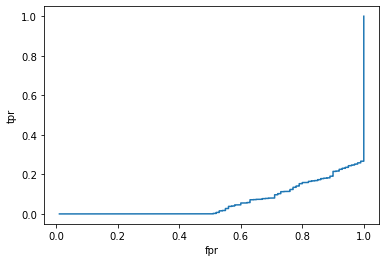

In [57]:
# write your code here for task B
y_predb = []
for index, row in df_b.iterrows():
    if(row['proba'] < 0.5):
        y_predb.append(0.0)
    else:
        y_predb.append(1.0)
df_b['y_pred'] = y_predb


TNR, FPR, FNR, TPR, TN, FP, FN, TP = confusion_matrix(df_b['y'].values, df_b['y_pred'].values)
print('TNR: '+' '+str(TNR)+' '+'FPR: '+' '+str(FPR)+' '+' FNR: '+' '+str(FNR)+' '+'TPR:'+' '+str(TPR))

def precision(tp, fp):
    '''This method takes input as true positive and false positive values as input
    and calculates precision value'''
    return tp/(tp+fp)

def recall(tp, fn):
    '''This method takes true positive and false negative as input and
    calculates recall, in other words it's also called TPR '''
    return tp/(tp+fn)

def f1_score(tp, fp, fn):
    '''This method takes true positive, false positive, false negative as input 
    and calculates f1_score metrics'''
    pr = precision(tp, fp)
    re = recall(tp, fn)
    return (2*pr*re)/(pr+re)

def accuracy(tp, N):
    '''This method calculates accuracy score with input as true positive and length of inputs'''
    return tp/N


f1_score = f1_score(TP, FP, FN)
print("F1_Score: "+str(f1_score))

accuracy = accuracy(TP, TN+FP+FN+TP)
print("Accuracy: "+str(accuracy))

tpr_array, fpr_array, AUCScore = custom_AUC(df_b['y'].values, df_b['proba'])
print("AUC score: "+str(AUCScore))

#plot TPR, FPR values
plt.plot(tpr_array, fpr_array)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [58]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [66]:
_nUiqueEleSorted = np.sort(list(set(df_c['prob'])) , axis = None, kind = 'quicksort')[::-1]

FNList = []
FPList = []
for i in range(len(_nUiqueEleSorted)):
    y_pred = df_c['prob'].apply(lambda y:0 if y < _nUiqueEleSorted[i] else 1)
    TNR, FPR, FNR, TPR, TN, FP, FN, TP = confusion_matrix(df_c['y'], y_pred)
    FNList.append(FN)
    FPList.append(FP)
    
Alist = []  
for i in range(len(FNList)):
    A = (500 * FNList[i])+(100 * FPList[i])
    Alist.append(A)
    
min_index_of_Alist = Alist.index(min(Alist))
best_threshold = _nUiqueEleSorted[min_index_of_Alist]

print("Best Threshold: ", best_threshold)



Best Threshold:  0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [67]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [92]:
def meanSquaredError(y_actual, y_pred):
    '''This method takes y_actual and y_prediction as input
    and returns mean squared errors'''
    if((type(y_actual) != type(y_pred)) and isinstance(y_actual, np.ndarray) and isinstance(y_pred, np.ndarray)):
        print("invalid input, both inputs should be of same type i.e np.ndarray")
    elif(len(y_actual) != len(y_pred)):
        print("inputs are not of same length, to comapre both inputs should be of same length.")
    else:
        squared_error = 0
        for index in range(len(y_actual)):
            squared_error += np.power((y_actual[index]-y_pred[index]),2)
        mean_squared_error = squared_error/len(y_actual)
        return mean_squared_error
            
print("Mean Squared Error: ", meanSquaredError(df_d['y'], df_d['pred']))

#Mean absolute percentage error
def modified_meanAbsolutePercentageError(y_actual, y_pred):
    '''This method takes y_actual and y_prediction as input for regression
    and returns modified mean absolute percentage error'''
    if((type(y_actual) != type(y_pred)) and isinstance(y_actual, np.ndarray) and isinstance(y_pred, np.ndarray)):
        print("invalid input, both inputs should be of same type i.e np.ndarray")
    elif(len(y_actual) != len(y_pred)):
        print("inputs are not of same length, to comapre both inputs should be of same length.")
    else:
        error_is = 0
        a = 0
        for index in range(len(y_actual)):
            error_is += np.absolute(y_actual[index]-y_pred[index])
            a += y_actual[index]
        mape = (error_is/a)*100
        return mape
print("Mean Absolute Percentage Error: ", modified_meanAbsolutePercentageError(df_d['y'], df_d['pred']))

def sumOfSquaredTotal(y_actual):
    '''This method takes y_actual as input and calculates sum of squared total and returns it'''
    y_avg = np.mean(y_actual)
    ss_total = 0
    for index in range(len(y_actual)):
        ss_total += np.power(y_actual[index]-y_avg,2)
    return ss_total

def sumOfSquaresResidue(y_actual, y_pred):
    '''This method takes y_actual and y_prediction as input for regression
    and calculates sum of squared residues and returns it.'''
    ss_residue = 0
    for index in range(len(y_actual)):
        ss_residue += np.power((y_actual[index]-y_pred[index]),2)
    return ss_residue

def rSquaredORCoeffiOfDetermination(y_actual, y_pred):
    '''This method takes y_actual and y_prediction as input and calculates r squared error or 
    also called as Coefficient of determination and returns it'''
    ss_total = sumOfSquaredTotal(y_actual)
    ss_residue = sumOfSquaresResidue(y_actual, y_pred)
    r_squared = (1 - (ss_residue/ss_total))
    return r_squared

print("R squared Error: ", rSquaredORCoeffiOfDetermination(df_d['y'].values, df_d['pred'].values))


Mean Squared Error:  177.16569974554707
Mean Absolute Percentage Error:  12.91202994009687
R squared Error:  0.9563582786990964
